In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#######################################################################################
# Reading the data file (CSV) & Defining feature columns and target column
#######################################################################################
# 1. Reading the data file (CSV)
df = pd.read_csv("../0000_Data/01-raw/01-Ad.csv")

# 2. Defining feature columns and target column
x_values = df.iloc[:, 3:5].values
y_values = df.iloc[:, -1].values  

In [5]:
########################################################################################
# Preprocessing Data
########################################################################################
# Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.25, stratify=y_values, random_state=40)

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
##########################################################################################
# Building the Model & Prediction with Random Forest Classifier
##########################################################################################
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(x_train_scaled, y_train)
y_pred = classifier.predict(x_test_scaled)

In [ ]:
#########################################################################################
# Evaluating the Model with F1 Score & AUC & Accuracy and print the results
#########################################################################################
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")

F1 Score: 0.8684
AUC: 0.9036
Accuracy: 0.9000


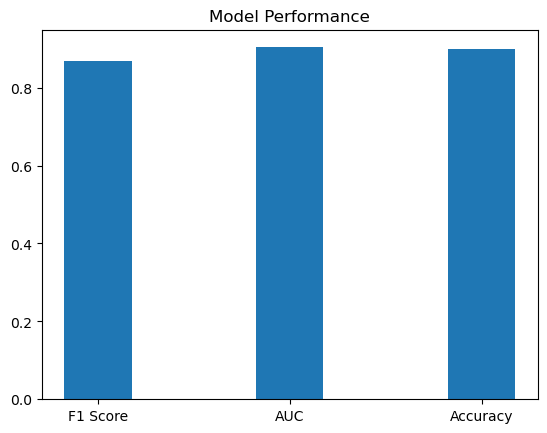

In [9]:
# Visualize the model performance with a bar chart
metrics = ['F1 Score', 'AUC', 'Accuracy']
scores = [f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred), accuracy_score(y_test, y_pred)]
x = np.arange(len(metrics))
width = 0.35
plt.bar(x, scores, width)
plt.xticks(x, metrics)
plt.title('Model Performance')
plt.show()

C:\Users\HP  VICTUS\AppData\Local\Temp\ipykernel_21848\3799792573.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


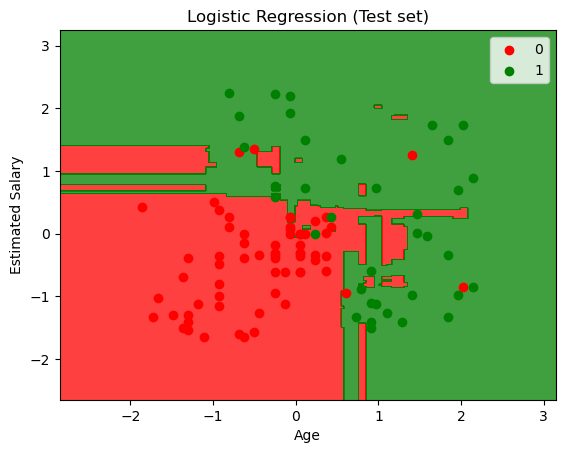

In [ ]:
# Visualize the model on plot with matplotlib 
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()